## NN on Titanic Dataset

Binary classification

https://www.kaggle.com/hesh97/titanicdataset-traincsv

In [1]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pushpit19jain","key":"b7c5f470a3b48f2bdcf9577295307ba6"}'}

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d hesh97/titanicdataset-traincsv

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 8.75MB/s]


In [4]:
!unzip /content/titanicdataset-traincsv.zip

Archive:  /content/titanicdataset-traincsv.zip
  inflating: train.csv               


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("/content/train.csv")

In [8]:
l1 = ['PassengerId', 'Ticket', 'Cabin']
df.drop(l1, axis=1, inplace=True)

temp = df["Name"].unique()
st = []    # creating a set
j = 1
for i in temp:
  a = i.split()   # list of all words of each row
  for k in a :
    if '.' in k:
      st.append(k)
      break

st = np.array(st)
df["New_Name"] = st
l2 = ["Name"]
df.drop(l2, axis=1, inplace=True)

emb = list(df["Embarked"].mode()) [0]
df["Age"].fillna (df["Age"].mean(), inplace=True)
df["Embarked"].fillna(emb, inplace=True)

# Label Encoding embarked, new name, sex
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_emb = LabelEncoder()
le_new_name = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])
df["Embarked"] = le_emb.fit_transform(df["Embarked"])
df["New_Name"] = le_new_name.fit_transform(df["New_Name"])



In [10]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.1)

# Normalizing
sc_x = StandardScaler()
xtrain = sc_x.fit_transform (xtrain)
xtest = sc_x.transform (xtest)

In [25]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape 

((801, 8), (90, 8), (801,), (90,))

## NN

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [14]:
clf1 = Sequential ()

In [15]:
clf1.add(Dense(units=32, activation="relu", input_shape=(8,)))

In [17]:
clf1.add(Dense(units=32, activation="relu"))

In [18]:
clf1.add(Dense(units=1, activation="sigmoid"))
# sigmoid since binary classification

In [29]:
clf1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [30]:
clf1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [31]:
print(type(clf1))
clf1.fit(xtrain, 
         ytrain, 
         batch_size=32,  
         validation_split=0.1,
         epochs=100)

<class 'keras.engine.sequential.Sequential'>
Epoch 1/100
23/23 [==============================] - 2s 26ms/step - loss: 0.7140 - accuracy: 0.4596 - val_loss: 0.6474 - val_accuracy: 0.7284
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.7585 - val_loss: 0.5725 - val_accuracy: 0.7654
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.8149 - val_loss: 0.5175 - val_accuracy: 0.7901
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7947 - val_loss: 0.4820 - val_accuracy: 0.8025
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.8248 - val_loss: 0.4575 - val_accuracy: 0.8148
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.7992 - val_loss: 0.4544 - val_accuracy: 0.8025
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.8207 - val_los

87% and 82%

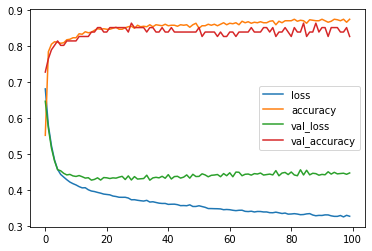

In [32]:
pd.DataFrame(clf1.history.history).plot()
plt.show()

this shows overfitting to some point as val_loss stopped decreasing but loss is decreasing continuously

In [33]:
clf1.evaluate(xtest, ytest)

3/3 [==============================] - 0s 4ms/step - loss: 0.4931 - accuracy: 0.8111


[0.49307310581207275, 0.8111110925674438]

loss of 0.5 and accuracy = 81%

In [34]:
pred1 = clf1.predict(xtest)   
# gives probability of every data
pred1 = pred1 >= 0.5

from sklearn.metrics import confusion_matrix
confusion_matrix(pred1, ytest)

array([[49,  9],
       [ 8, 24]])

In [ ]:
clf2 = Sequential ()
clf2.add(Dense(units=64, activation="relu", input_shape=(8,)))
clf2.add(Dense(units=64, activation="relu"))
clf2.add(Dense(units=1, activation="sigmoid"))
clf2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print(clf2.summary())
clf2.fit(xtrain, ytrain, batch_size=32,  validation_split=0.1,epochs=100)

pd.DataFrame(clf2.history.history).plot()
plt.show()

Too much overfitting

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                576       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
23/23 [==============================] - 2s 16ms/step - loss: 0.6734 - accuracy: 0.5808 - val_loss: 0

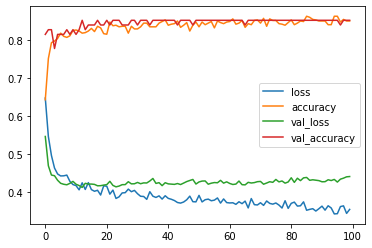

In [36]:
# trying with dropouts
clf3 = Sequential ()

clf3.add(Dense(units=64, activation="relu", input_shape=(8,)))
clf3.add(Dropout(0.25))

clf3.add(Dense(units=64, activation="relu"))
clf3.add(Dropout(0.25))

clf3.add(Dense(units=1, activation="sigmoid"))
clf3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print(clf3.summary())
clf3.fit(xtrain, ytrain, batch_size=32,  validation_split=0.1,epochs=100)

pd.DataFrame(clf3.history.history).plot()
plt.show()

Reduced to some extent but still

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                288       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
12/12 [==============================] - 1s 27ms/step - loss: 0.6953 - accuracy: 0.5489 - val_loss: 0

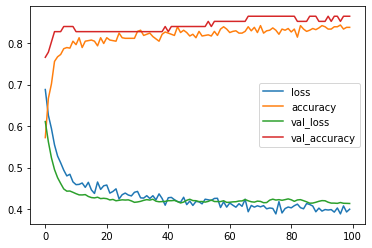

In [38]:
# trying with dropouts
clf4 = Sequential ()

clf4.add(Dense(units=32, activation="relu", input_shape=(8,)))
clf4.add(Dropout(0.25))

clf4.add(Dense(units=32, activation="relu"))
clf4.add(Dropout(0.25))

clf4.add(Dense(units=1, activation="sigmoid"))
clf4.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print(clf4.summary())
clf4.fit(xtrain, ytrain, batch_size=64,  validation_split=0.1,epochs=100)

pd.DataFrame(clf4.history.history).plot()
plt.show()

In [44]:
# increasing no of neuons will mostly increase overfitting
print(clf4.evaluate(xtrain, ytrain))
print(clf4.evaluate(xtest, ytest))
pred4 = clf4.predict(xtest)
pred4 = pred4 >= 0.5
print (confusion_matrix(ytest, pred4) )

count = 0
for i in range (pred4.shape[0]) :
  if (pred4[i]==True and ytest[i]==1) or (pred4[i]==False and ytest[i]==0):
    count += 1
count , "/", pred4.shape[0]


26/26 [==============================] - 0s 1ms/step - loss: 0.3738 - accuracy: 0.8527
[0.3737996816635132, 0.8526841402053833]
3/3 [==============================] - 0s 4ms/step - loss: 0.4257 - accuracy: 0.8333
[0.4256790280342102, 0.8333333134651184]
[[52  5]
 [10 23]]


(75, '/', 90)